### Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
from ipywidgets import interact

### Reading the Dataset

In [ ]:
# lets read the dataset
data = pd.read_csv("//content//gdrive//My Drive//Crop_recommendation.csv")

# lets check the shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [ ]:
# lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
# lets check the various crops and their count present in this Dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Descriptive Statistics

In [ ]:
# lets check the summary for all the available features

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [ ]:
# lets check the summary statistics for each of the Crops


def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("\n---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("\n---------------------------------------------")
    print("\nStatistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("\n---------------------------------------------")
    print("\nStatistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("\n---------------------------------------------")
    print("\nStatistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("\n---------------------------------------------")
    print("\nStatistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("\n---------------------------------------------")
    print("\nStatistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("\n---------------------------------------------")
    print("\nStatistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}\n".format(x['rainfall'].max()))

In [ ]:
# taking the input as crop that we require summary on

print('Crops : ',data.label.unique())
fcrop = input("\nName the Crop from the Given options : ")
summary(fcrop)

Crops :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Name the Crop from the Given options : cotton

---------------------------------------------
Statistics for Nitrogen
Minimum Nitrigen required : 100
Average Nitrogen required : 117.77
Maximum Nitrogen required : 140

---------------------------------------------

Statistics for Phosphorous
Minimum Phosphorous required : 35
Average Phosphorous required : 46.24
Maximum Phosphorous required : 60

---------------------------------------------

Statistics for Potassium
Minimum Potassium required : 15
Average Potassium required : 19.56
Maximum Potassium required : 25

---------------------------------------------

Statistics for Temperature
Minimum Temperature required : 22.00
Average Temperature required : 23.99
Maximum Temperature required : 25.99

-------

In [ ]:
## lets compare the average requirement for each crops with average conditions


def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("\nAverage Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("\n----------------------------------------------")
    print("\nApple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon\n'][conditions].mean()))

In [ ]:
print('Conditions:',['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'])
comparecondi = input("Enter the Condition require from above options: ")
compare(comparecondi)

Conditions: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
Enter the Condition require from above options: N

Average Value for N is 50.55

----------------------------------------------

Apple : 20.80
Banana : 100.23
Black Grams : 40.02
Coconut : 21.98
Coffee : 101.20
Cotton : 117.77
Chick Peas : 40.09
Grapes : 23.18
Jute : 78.40
Kidney Beans: 20.75
Lentils : 18.77
Maize : 77.76
Mango : 20.07
Papaya : 49.88
Muskmelon : 100.32
Moth Beans : 21.44
Mung Beans : 20.99
Oranges : 19.58
Pigeon Peas : 20.73
Pomegranate : 18.87
Rice : 79.89
Watermelon : nan


In [ ]:
# lets make this funtion more Intuitive

def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("\nCrops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("\n----------------------------------------------")
    print("\nCrops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

In [ ]:
print('COnditions:',['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'])
rancondi = input("Enter the Feature require from above options: ")
compare(rancondi)

COnditions: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
Enter the Feature require from above options: P

Crops which require greater than average P 

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'banana' 'grapes' 'apple' 'papaya'
 'cotton' 'jute']

----------------------------------------------

Crops which require less than average P 

['rice' 'maize' 'mothbeans' 'mungbean' 'pomegranate' 'mango' 'watermelon'
 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


### Analyzing Agricultural Conditions

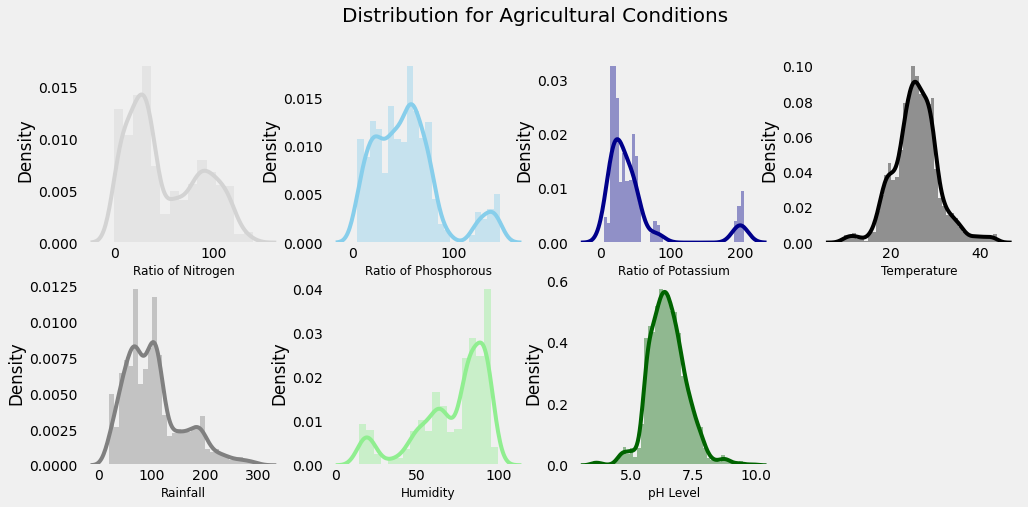

In [ ]:
### Lets check the distribution of Agricultural Conditions

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [ ]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [ ]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Clustering Similar Crops

In [ ]:
### Lets try to Cluster these Crops

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


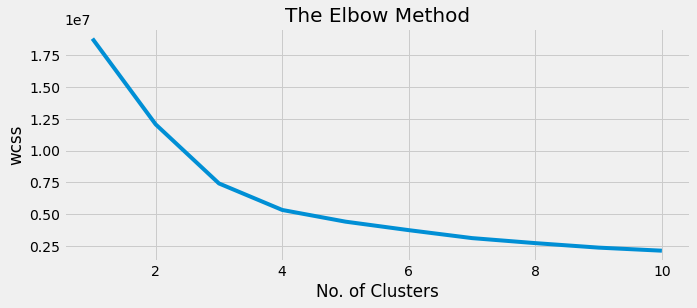

In [ ]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
# Hard Clustering

print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 4:", list(d.index))

Results for Hard Clustering

Crops in Cluster 1: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 3: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


### visualizing the Hidden Patterns

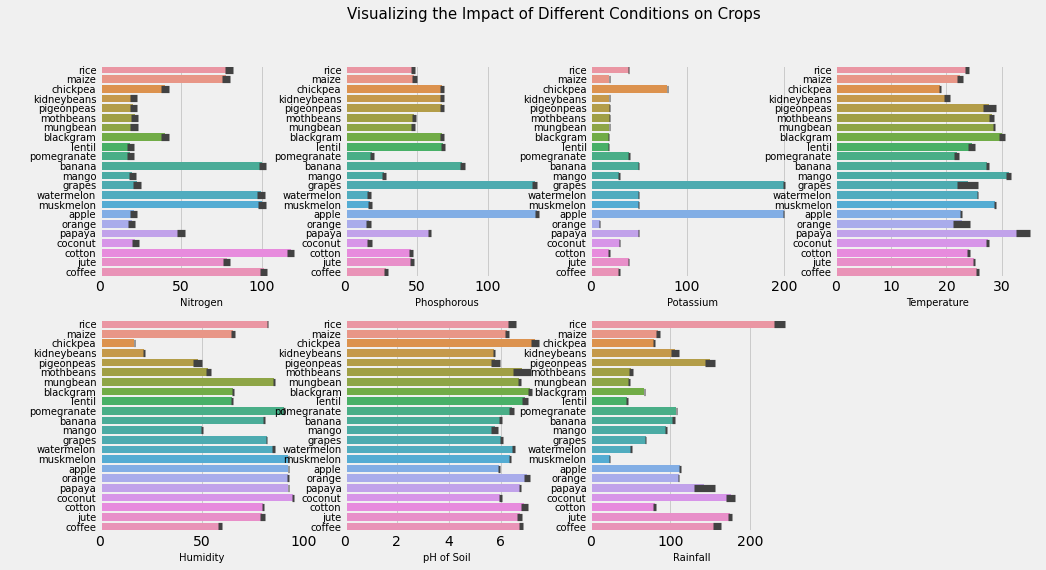

In [ ]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

# Predictive Modelling

In [ ]:
# lets split the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [ ]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


# Logistic Regression

In [ ]:
# lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

In [ ]:
score = log_model.score(x_test,y_test)
print("Accuracy for Logistic Regression is "+str(score))

Accuracy for Logistic Regression is 0.9681818181818181


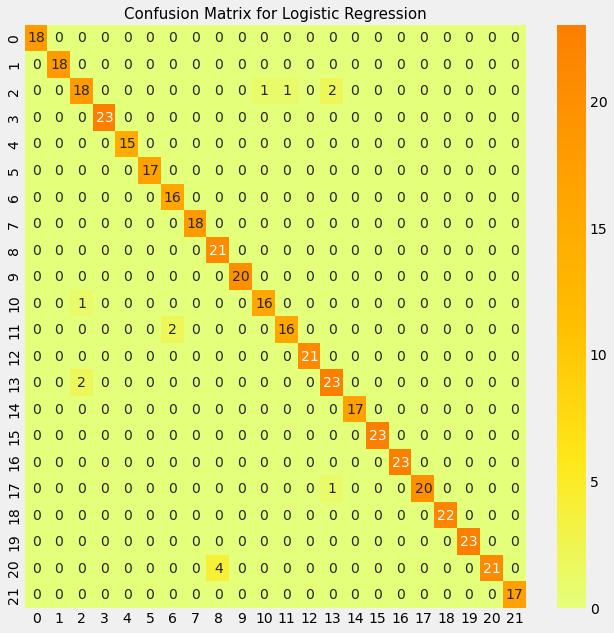

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
# lets evaluate the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred_log)
print(cr)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion="entropy",splitter="best",max_features = 7,max_depth=6)
dec_tree.fit(x_train,y_train)
y_pred_dec = dec_tree.predict(x_test)

In [ ]:
score = dec_tree.score(x_test,y_test)
print("Accuracy for Decision Tree is "+str(score))

Accuracy for Decision Tree is 0.9818181818181818


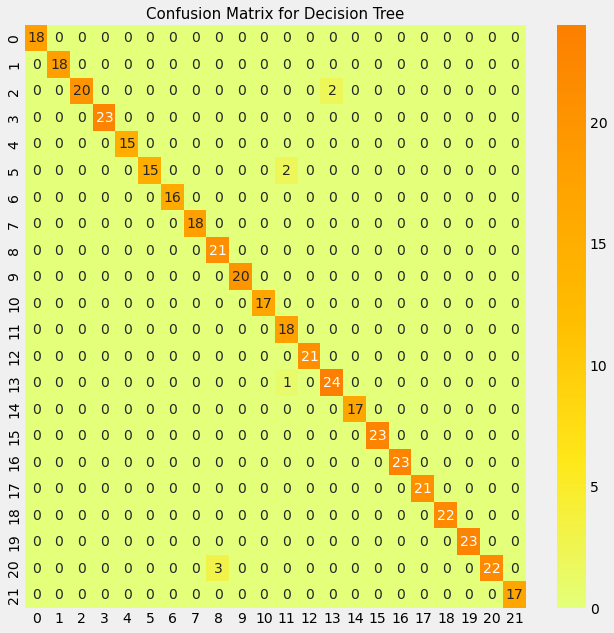

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.88      0.94        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.96      0.94        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
# lets evaluate the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred_dec)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Decision Tree', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred_dec)
print(cr)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

In [ ]:
score = svc.score(x_test,y_test)
print("Accuracy for Support Vector Classifier is "+str(score))

Accuracy for Support Vector Classifier is 0.9772727272727273


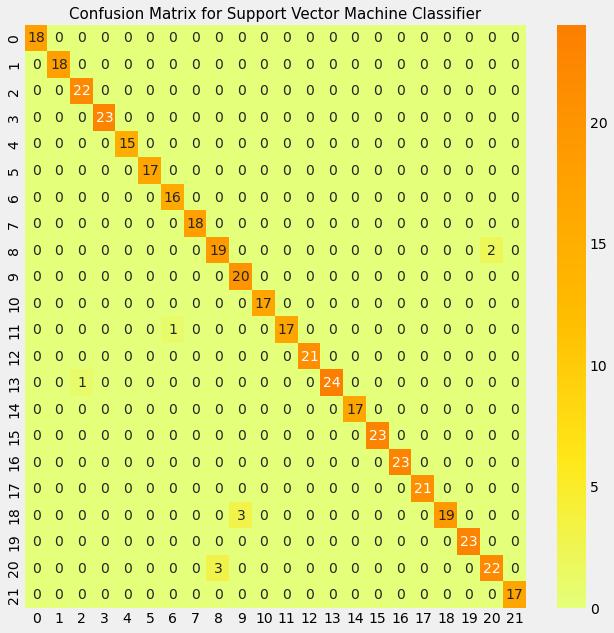

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.90      0.88        21
 kidneybeans       0.87      1.00      0.93        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
# lets evaluate the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Support Vector Machine Classifier', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred_svc)
print(cr)

###### We can see that Decision tree is giving more accuracy then SVM and Logistic Regression

### Real time Predictions

In [ ]:
n_real = input('Enter N :')
p_real = input('Enter P :')
k_real = input('Enter K :')
temp_real = input('Enter Temperature :')
hum_real = input('Enter Humidity :')
ph_real = input('Enter Ph :')
rainfall_real = input('Enter Rainfall :')

Enter K :100


In [ ]:
prediction = dec_tree.predict((np.array([[n_real,p_real,k_real,temp_real,hum_real,ph_real,rainfall_real]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)